# Customer Conversion Prediction

# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [4]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [5]:
a =(len(df[df['y'] == 'yes']))/(df.shape[0])
b = (len(df[df['y'] == 'no']))/(df.shape[0])
print('Check for Imbalancing : ','\n'
      '% of yes :', a,'\n'
      '% of no :', b, '\n'
     )

Check for Imbalancing :  
% of yes : 0.11698480458295547 
% of no : 0.8830151954170445 



# Data Cleaning 

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(45205, 11)

# AGE

In [8]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [9]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

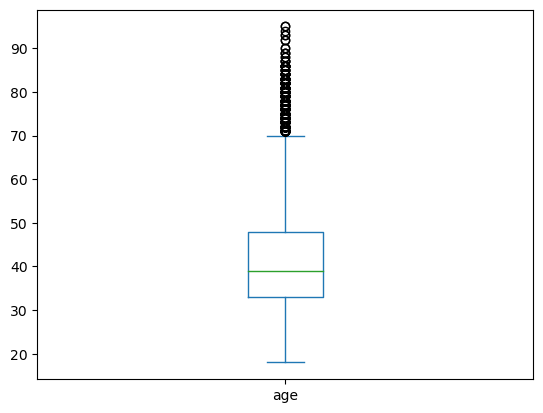

In [10]:
df.age.plot.box()

# JOB

In [11]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
len(df[(df['job'] == 'unknown') & (df['education_qual'] == 'unknown') & (df['call_type'] == 'unknown') & (df['prev_outcome'] == 'unknown')])

54

In [13]:
df.groupby(['job', 'y'])['y'].count()

job            y  
admin.         no     4539
               yes     631
blue-collar    no     9022
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8156
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3784
               yes     369
student        no      669
               yes     269
technician     no     6756
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

In [14]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
for i in['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['job'] == i) & (df['y'] == 'yes')]))  /len(df[df['job'] == i]) )*100 ))

Conversion % of  management  :  13.757005392830706
Conversion % of  technician  :  11.058451816745656
Conversion % of  entrepreneur  :  8.271687962340282
Conversion % of  blue-collar  :  7.276464542651594
Conversion % of  unknown  :  11.805555555555555
Conversion % of  retired  :  22.791519434628977
Conversion % of  admin.  :  12.205029013539653
Conversion % of  services  :  8.885143269925354
Conversion % of  self-employed  :  11.842938568714375
Conversion % of  unemployed  :  15.502686108979278
Conversion % of  housemaid  :  8.790322580645162
Conversion % of  student  :  28.678038379530918


# Marital

In [16]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [17]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
df.groupby(['marital', 'y'])['y'].count()

marital   y  
divorced  no      4585
          yes      622
married   no     24455
          yes     2755
single    no     10876
          yes     1912
Name: y, dtype: int64

In [19]:
for i in['married', 'single', 'divorced'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['marital'] == i) & (df['y'] == 'yes')]))  /len(df[df['marital'] == i]) )*100 ))

Conversion % of  married  :  10.124954061006983
Conversion % of  single  :  14.95151704723178
Conversion % of  divorced  :  11.945458037257538


# Education

In [20]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [21]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [22]:
df.groupby(['education_qual', 'y'])['y'].count()

education_qual  y  
primary         no      6259
                yes      591
secondary       no     20749
                yes     2450
tertiary        no     11303
                yes     1996
unknown         no      1605
                yes      252
Name: y, dtype: int64

In [23]:
for i in ['tertiary', 'secondary', 'unknown', 'primary'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['education_qual'] == i) & (df['y'] == 'yes')]))  /len(df[df['education_qual'] == i]) )*100 ))

Conversion % of  tertiary  :  15.008647266711783
Conversion % of  secondary  :  10.560800034484245
Conversion % of  unknown  :  13.5702746365105
Conversion % of  primary  :  8.627737226277372


# call type

In [24]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [25]:
df.groupby(['call_type', 'y'])['y'].count()

call_type  y  
cellular   no     24913
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12487
           yes      530
Name: y, dtype: int64

# Month

In [26]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [27]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [28]:
df.groupby(['mon', 'y'])['y'].count()

mon  y  
apr  no      2355
     yes      577
aug  no      5557
     yes      688
dec  no       114
     yes      100
feb  no      2208
     yes      441
jan  no      1261
     yes      142
jul  no      6267
     yes      627
jun  no      4793
     yes      546
mar  no       229
     yes      248
may  no     12840
     yes      925
nov  no      3567
     yes      403
oct  no       415
     yes      323
sep  no       310
     yes      269
Name: y, dtype: int64

In [29]:
df.shape[0]

45205

In [30]:
for i in['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['mon'] == i) & (df['y'] == 'yes')]))  /len(df[df['mon'] == i]) )*100 ))

Conversion % of  may  :  6.719941881583727
Conversion % of  jun  :  10.226634201161266
Conversion % of  jul  :  9.094865100087032
Conversion % of  aug  :  11.016813450760608
Conversion % of  oct  :  43.766937669376695
Conversion % of  nov  :  10.151133501259446
Conversion % of  dec  :  46.728971962616825
Conversion % of  jan  :  10.121168923734853
Conversion % of  feb  :  16.64779161947905
Conversion % of  mar  :  51.99161425576519
Conversion % of  apr  :  19.679399727148706
Conversion % of  sep  :  46.45941278065631


# call duration

In [31]:
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [32]:
q1 = df.dur.quantile(0.25)
q3 = df.dur.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 643 duration : ', len(df[df['dur'] > 643]))

Lower thersold :  -221.0 
Upper thersold :  643.0
count of greater than 643 duration :  3235


<AxesSubplot:>

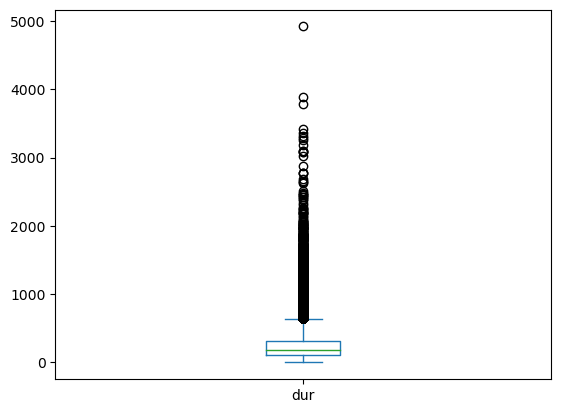

In [33]:
df.dur.plot.box()

# Number of calls

<AxesSubplot:>

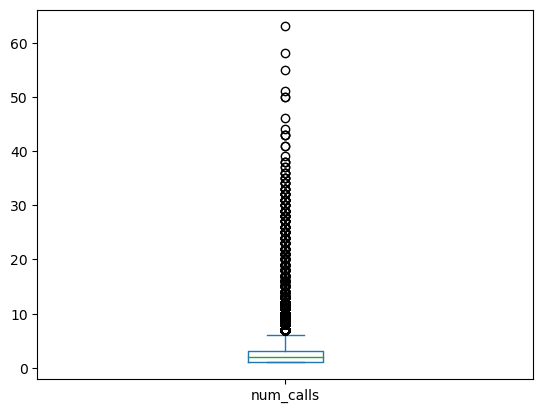

In [34]:
df.num_calls.plot.box()

In [35]:
df.num_calls = df.num_calls.clip(1.0,6.0)
df.dur = df.dur.clip(0,643.0)

# Previous Outcome

In [36]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [37]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [38]:
for i in ['unknown', 'failure', 'other', 'success'] :
    print('Conversion % of ', i, ' : ', ((  (len(df[(df['prev_outcome'] == i) & (df['y'] == 'yes')]))  /len(df[df['prev_outcome'] == i]) )*100 ))

Conversion % of  unknown  :  9.162990826184613
Conversion % of  failure  :  12.609671495613139
Conversion % of  other  :  16.684782608695652
Conversion % of  success  :  64.72534745201854


# Target

In [39]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [40]:
df.to_csv('cleaned.csv')

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [42]:
df['y'] = df['y'].replace({'yes' : 1, 'no' : 0})

# EDA

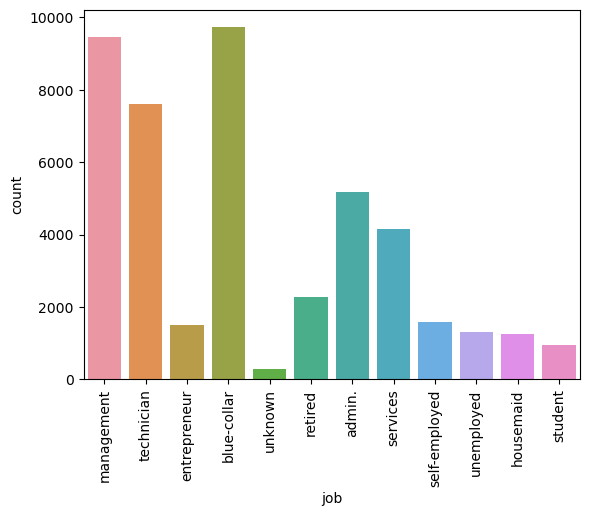

In [43]:
plot = sns.countplot(data = df, x = 'job')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='job'>

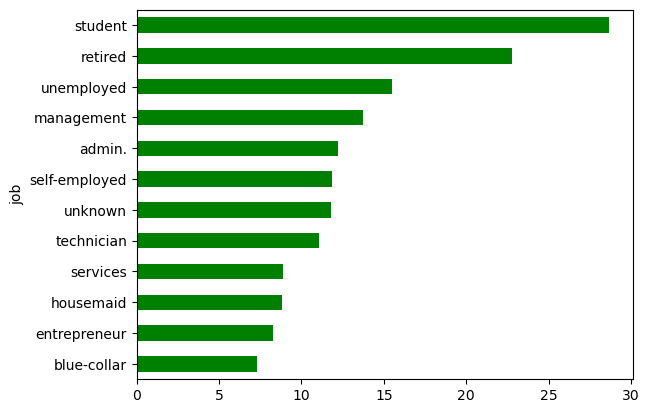

In [44]:
(df.groupby("job")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

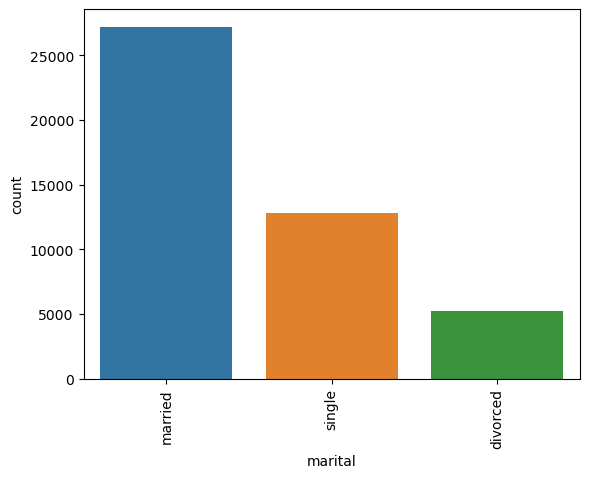

In [45]:
plot = sns.countplot(data = df, x = 'marital')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='marital'>

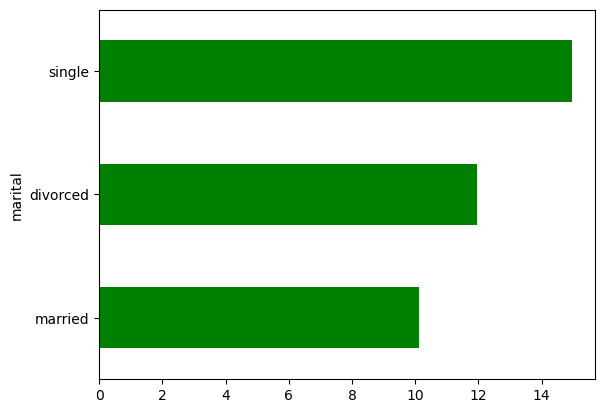

In [46]:
(df.groupby("marital")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

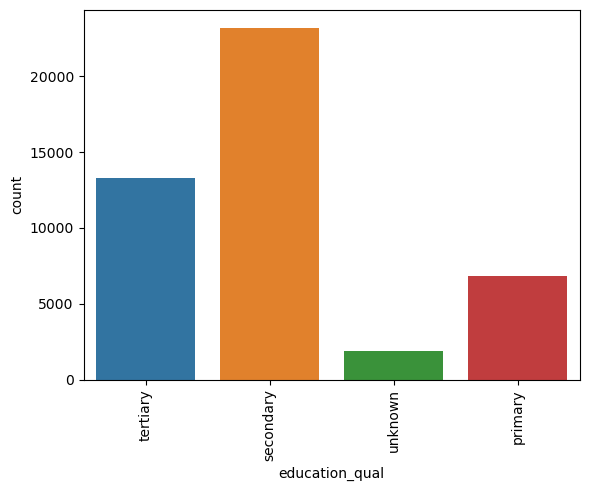

In [47]:
plot = sns.countplot(data = df, x = 'education_qual')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='education_qual'>

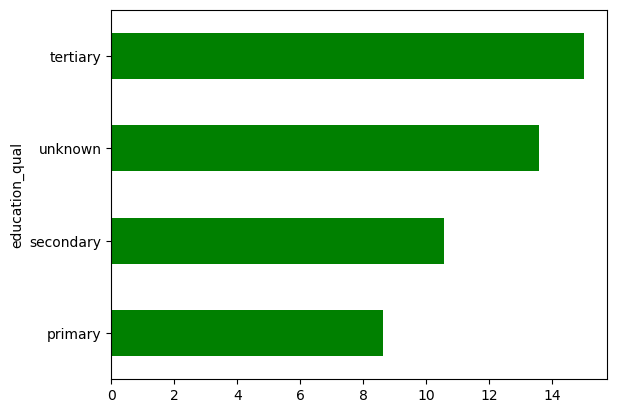

In [48]:
(df.groupby("education_qual")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

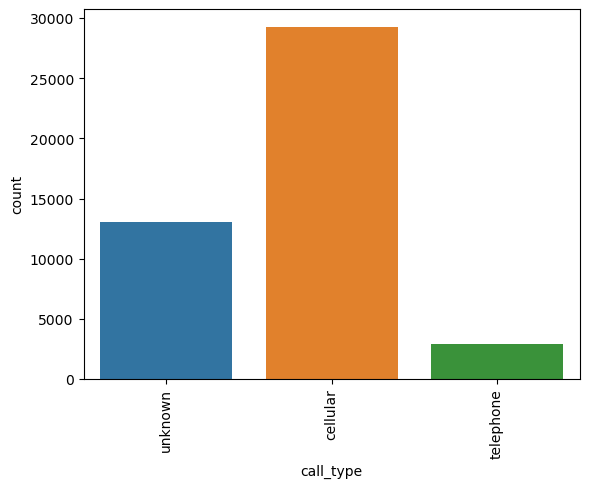

In [49]:
plot = sns.countplot(data = df, x = 'call_type')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='call_type'>

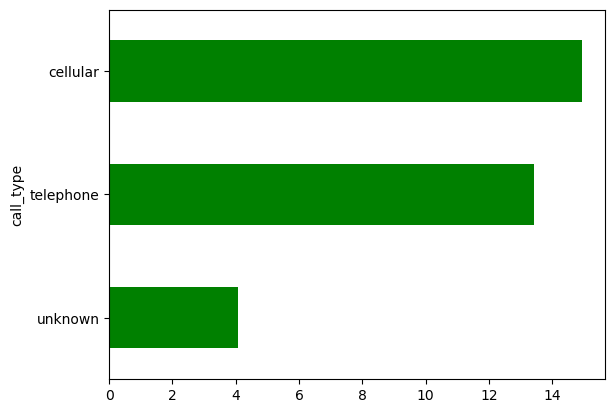

In [50]:
(df.groupby("call_type")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

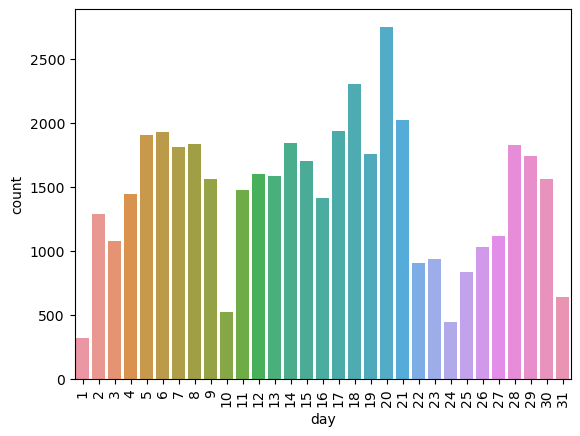

In [51]:
plot = sns.countplot(data = df, x = 'day')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='day'>

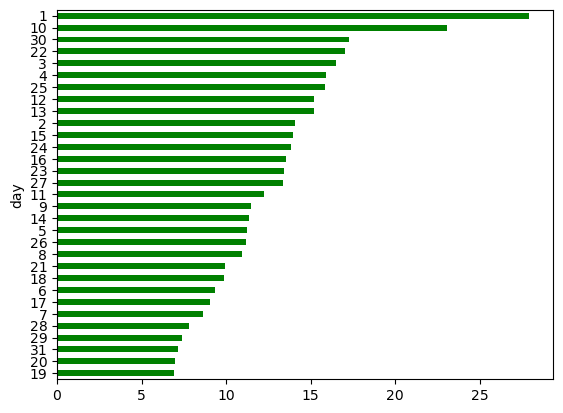

In [52]:
(df.groupby("day")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

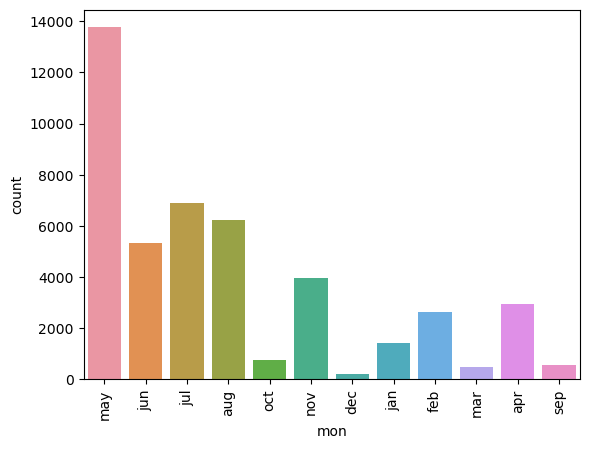

In [53]:
plot = sns.countplot(data = df, x = 'mon')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='mon'>

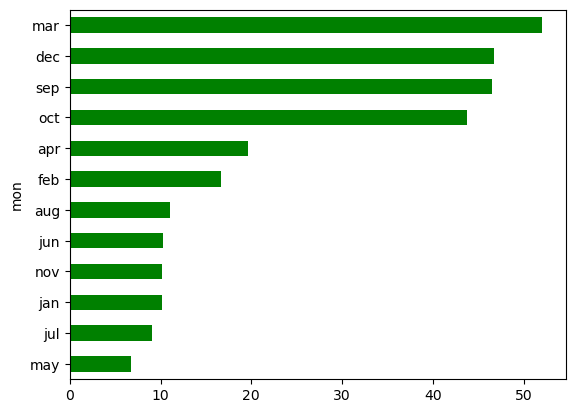

In [54]:
(df.groupby("mon")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

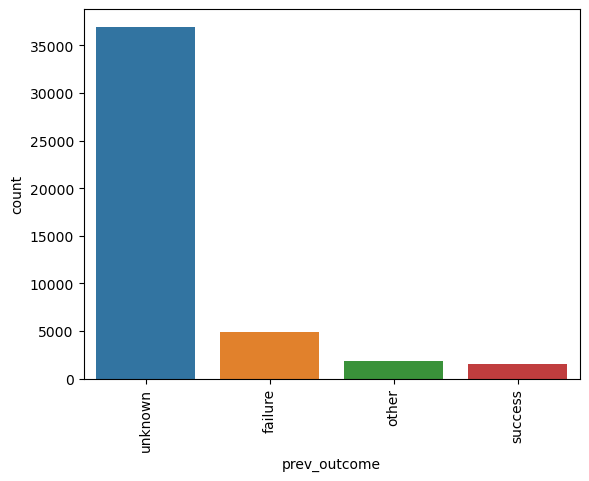

In [55]:
plot = sns.countplot(data = df, x = 'prev_outcome')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='prev_outcome'>

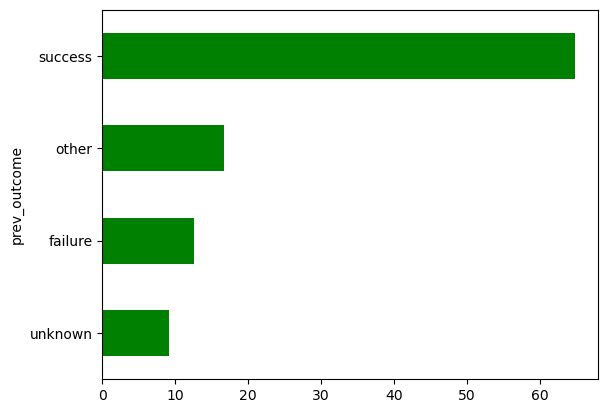

In [56]:
(df.groupby("prev_outcome")["y"].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='Frequency'>

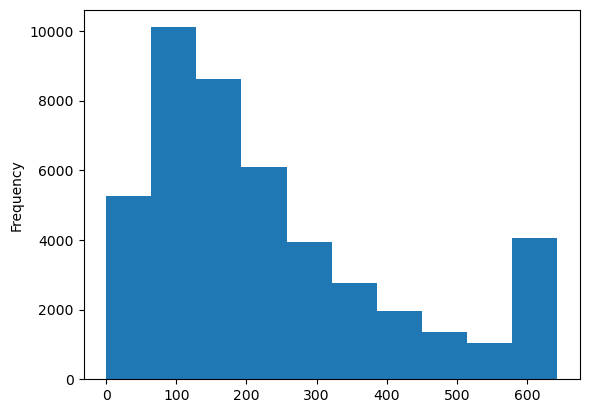

In [57]:
df.dur.plot.hist()

<AxesSubplot:ylabel='Density'>

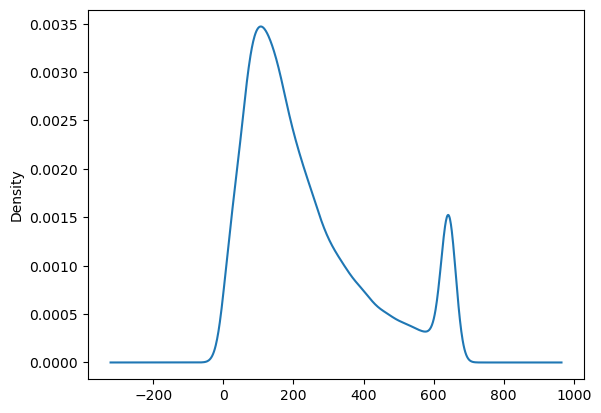

In [58]:
df.dur.plot.kde()

# Encoding

1. Encoding JOB, Martial, Education, month by highest conversion percentage.
2. For unknown in job - student
3. For unknown in call type - unknown
4. For unknown in previous outcome - unknown
5. For unknown in edu qual  - secondary

In [59]:
df['job'] = df['job'].replace({'management' : 3, 'technician' : 6, 'entrepreneur' : 9, 'blue-collar' : 10,
                               'unknown' : 0, 'retired' : 1, 'admin.' : 4, 'services' : 7, 'self-employed' : 5,
                               'unemployed' : 2, 'housemaid' : 8, 'student' : 0})


df['marital'] = df['marital'].replace({'married' : 2, 'single' : 0, 'divorced' : 1})


df['education_qual'] = df['education_qual'].replace({'tertiary' : 0, 'secondary' : 1, 'primary' : 2, 'unknown' : 1})


df['call_type'] = df['call_type'].replace({'cellular' : 0, 'telephone' : 1, 'unknown' : 2})


df['mon'] = df['mon'].replace({'may' : 11,'jul' : 10, 'aug' : 6, 'jun' : 7, 'nov' : 8, 'apr' : 4, 
                               'feb' : 5, 'jan' : 9, 'oct' : 3, 'sep' : 2, 'mar' : 0, 'dec' : 1})


df['prev_outcome'] = df['prev_outcome'].replace({'success' : 0, 'failure' : 2, 'unknown' : 3, 'other' : 1})

In [60]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [61]:
df.shape

(45205, 11)

In [62]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [63]:
df.to_csv('cleaned_encoded.csv')

# Features and Target Variable

In [64]:
X = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']]

y = df['y']

In [65]:
X.shape, y.shape

((45205, 10), (45205,))

# Spliting

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) 

In [67]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
10105,39,10,0,1,2,11,7,339.0,1.0,3
4950,29,4,2,1,2,21,11,211.0,1.0,3
1052,27,0,0,1,2,7,11,332.0,2.0,3
25045,50,10,1,2,0,18,8,58.0,1.0,3
25426,41,6,2,1,0,18,8,129.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...
2385,42,2,2,1,2,13,11,259.0,6.0,3
7873,35,6,0,1,2,30,11,66.0,4.0,3
36540,37,3,0,0,0,12,11,259.0,1.0,3
12864,35,9,2,2,0,7,10,236.0,1.0,3


# Balancing the data

In [68]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy="all")
X_train, y_train = smt.fit_resample(X_train, y_train)

In [69]:
X_train, y_train

(       age  job  marital  education_qual  call_type  day  mon         dur  \
 0       39   10        0               1          2   11    7  339.000000   
 1       29    4        2               1          2   21   11  211.000000   
 2       27    0        0               1          2    7   11  332.000000   
 3       50   10        1               2          0   18    8   58.000000   
 4       41    6        2               1          0   18    8  129.000000   
 ...    ...  ...      ...             ...        ...  ...  ...         ...   
 51446   72    3        2               1          0   25    4  386.209852   
 51447   34    3        1               0          0   29    9  293.237911   
 51448   29    4        2               0          0    9    3  179.676182   
 51449   39    3        1               0          0   15    8  346.863182   
 51450   53    3        2               0          0   11    7  166.185869   
 
        num_calls  prev_outcome  
 0       1.000000           

# Models

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict_log = log.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,y_predict_log)

0.8776707796516796

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in range(1,15) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_predict_dt = dt.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_predict_dt)
    print('Depth : ', depth, 'Train Score : ', dt.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring = 'roc_auc')))


Depth :  1 Train Score :  0.7785854502342034 AUROC :  0.7174797838603569 Cross Validation :  0.7814737665493758
Depth :  2 Train Score :  0.8352996054498455 AUROC :  0.786366879634449 Cross Validation :  0.8616931863508345
Depth :  3 Train Score :  0.8666886940972964 AUROC :  0.8360095907047791 Cross Validation :  0.921996476543327
Depth :  4 Train Score :  0.8910030903189442 AUROC :  0.8568942730029948 Cross Validation :  0.9464746093238974
Depth :  5 Train Score :  0.9154924102544169 AUROC :  0.8726306439890559 Cross Validation :  0.96035405756032
Depth :  6 Train Score :  0.9236166449631689 AUROC :  0.8807993401695278 Cross Validation :  0.9682417897800143
Depth :  7 Train Score :  0.9357058171852831 AUROC :  0.8879768299161306 Cross Validation :  0.97182205191911
Depth :  8 Train Score :  0.9438883597986434 AUROC :  0.8848393634457377 Cross Validation :  0.9744051220159727
Depth :  9 Train Score :  0.9488250957221434 AUROC :  0.8762418773241183 Cross Validation :  0.973169716534894

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_predict_dt)

0.8846462645081321

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_predict_rf)

0.8710836912110247

# XGBoost

In [74]:
import xgboost as xgb

for lr in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    xg = xgb.XGBClassifier(learning_rate = lr, n_estimator = 100, verbosity = 0)
    xg.fit(X_train, y_train)
    y_predict_xg = xg.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_predict_xg)
    print('Learning Rate : ', lr, 'Train Score : ', xg.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(xg, X_train, y_train, cv=10, scoring = 'roc_auc')))


Learning Rate :  0.1 Train Score :  0.9713125109327321 AUROC :  0.9188343158946584 Cross Validation :  0.9940142931183222
Learning Rate :  0.2 Train Score :  0.9812442906843405 AUROC :  0.920260758837835 Cross Validation :  0.9952845514982485
Learning Rate :  0.3 Train Score :  0.9866086179083011 AUROC :  0.9188111753234015 Cross Validation :  0.995563272644605
Learning Rate :  0.4 Train Score :  0.9907679151036909 AUROC :  0.920362152548608 Cross Validation :  0.9957677193356496
Learning Rate :  0.5 Train Score :  0.9934889506520768 AUROC :  0.9185134780226429 Cross Validation :  0.9959025615139667
Learning Rate :  0.6 Train Score :  0.9961322423276515 AUROC :  0.9169547872736844 Cross Validation :  0.9957704638998802
Learning Rate :  0.7 Train Score :  0.9972595284834114 AUROC :  0.916526779863932 Cross Validation :  0.9957975009912374
Learning Rate :  0.8 Train Score :  0.9989504577170512 AUROC :  0.9139178947192693 Cross Validation :  0.9957413923016496
Learning Rate :  0.9 Train S

In [75]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate = 0.5, n_estimator = 100, verbosity = 0)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_predict_xg)

0.9185134780226429

# Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 =DecisionTreeClassifier(max_depth = 9)
model2 = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
model3 = xgb.XGBClassifier(learning_rate = 0.5, n_estimator = 100, verbosity = 0)
model4 = LogisticRegression()
model5 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('Decision Tree : ', model1), ('Random Forest : ', model2),('XGBoost : ',model3), ('Logistic Regression : ', model4), ('KNN : ', model5)], voting = 'soft') 

model.fit(X_train, y_train)
y_predict_voting = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_predict_voting)

0.9059487067811637

# AUROC

In [82]:
AUROC = pd.Series({'XGBoost' : (roc_auc_score(y_test, y_predict_xg)),
                   'Voting Classifier' : (roc_auc_score(y_test, y_predict_voting)),
                   'Decision Tree' : (roc_auc_score(y_test, y_predict_dt)),
                   'Random Forest' : (roc_auc_score(y_test, y_predict_rf)),
                   'Logistic Regression' : (roc_auc_score(y_test,y_predict_log))})
AUROC

XGBoost                0.918513
Voting Classifier      0.905949
Decision Tree          0.884646
Random Forest          0.871084
Logistic Regression    0.877671
dtype: float64

# Important Features

In [78]:
importances = list((xg.feature_importances_)*100)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]


feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

 
[print('{:15} - {}'.format(*pair)) for pair in feature_importances];


call_type       - 27.93000030517578
prev_outcome    - 23.559999465942383
dur             - 12.739999771118164
mon             - 11.979999542236328
num_calls       - 7.110000133514404
education_qual  - 5.429999828338623
job             - 3.9200000762939453
marital         - 3.4100000858306885
day             - 2.4200000762939453
age             - 1.4900000095367432


# Result
I have witnessed XGBoost as the best model which yields around 0.918 AUROC score.

# Suggestions

1. "Blue-Collar" job title have lesser conversion rate and the attempts made are huge, hence resources try to target other sector more for higher conversion rate.  

2. In Marital status, "Single" having good conversion rate than other categories, The person who is single spends less hence selecting insurance to avail tax exemptions under Section 80C.

3. In the months of March, December, September and October, the conversion rates are very high, the company should aim to convert these months to increase their business.